In [3]:
# Functions:
# 1) Reads degree centrality values form csv, 
# 2) displays histograms and 
# 3) analyses power law fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
import time
import statsmodels.api as sm
from fun.fun import *

In [4]:
# Variables
edges_fn = '../data/edges.csv'
degree_fn = '../data/degree_centralities.csv'

In [6]:
# -> IN : Read degree centrality values
dc = pd.read_csv(degree_fn, index_col='node')
dc

,degree
node,
0,253
1,138
2,102
3,349
4,42
...,...
410880,458
410881,1487
410882,2


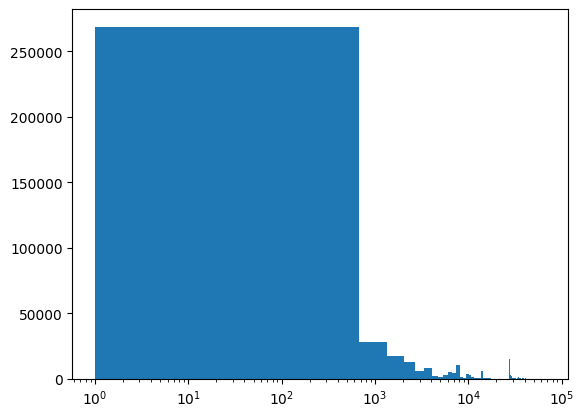

In [46]:
degree = dc['degree']
plt.hist(degree, bins=100)
plt.xscale('log')
plt.show()

In [124]:
# 
values = dc['degree']
steps = 100
v_min, v_max = min(values), max(values)
v_step = (v_max-v_min)/steps

bins = np.arange(v_min, v_max+v_step, (v_max-v_min)/steps)
log_bins = np.logspace(np.log10(v_min), np.log10(v_max), steps+1)

v_hist =           [ len([ x for x in values if (bins[i] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_hist_cum =       [ len([ x for x in values if (bins[0] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_log_hist =       [ len([ x for x in values if (log_bins[i] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]
v_log_hist_cum =   [ len([ x for x in values if (log_bins[0] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]
#at_end = len([x for x in values if x == v_max])


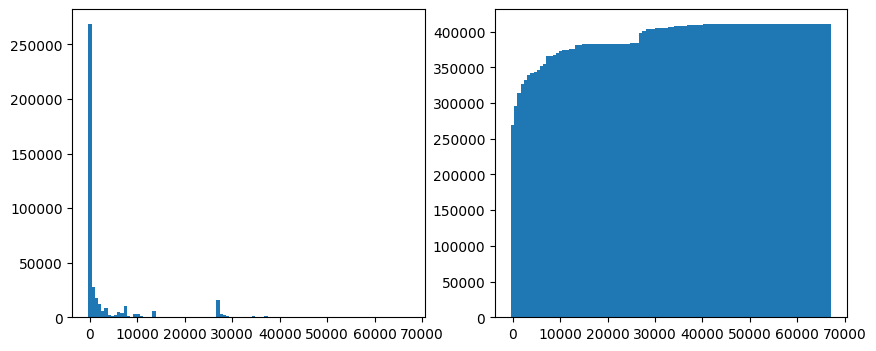

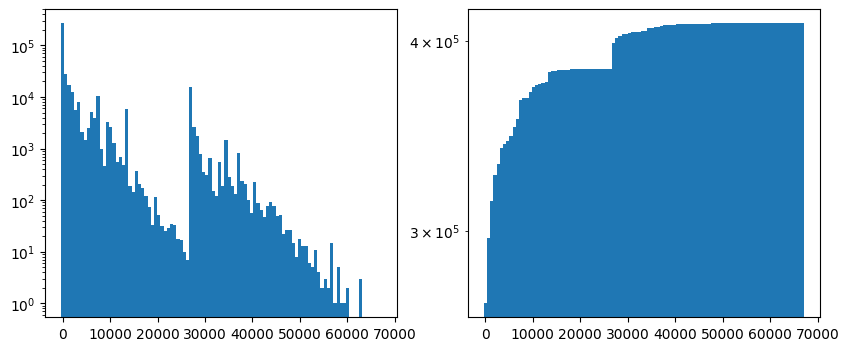

In [125]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].bar(bins[:steps], v_hist, width=v_step)
ax[1].bar(bins[:steps], v_hist_cum, width=v_step)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].bar(bins[:steps], v_hist, width=v_step)
ax[0].set_yscale('log')
ax[1].bar(bins[:steps], v_hist_cum, width=v_step)
ax[1].set_yscale('log')
plt.show()

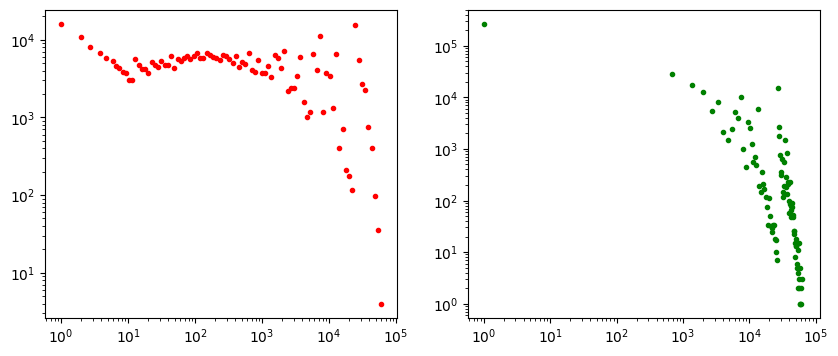

In [75]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].loglog(log_bins[:steps], v_log_hist, 'r.')
ax[1].loglog(bins[:steps], v_hist, 'g.')
plt.show()

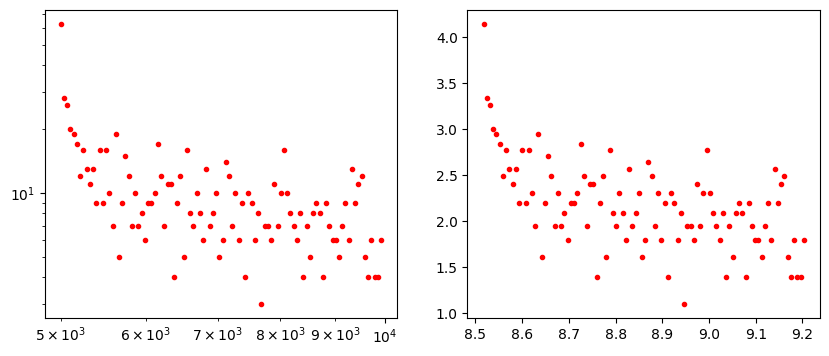

In [122]:
from scipy.stats import powerlaw
a = 0.559
values = (powerlaw.rvs(a, size=1000) + 1)*5000

v_min, v_max = min(values), max(values)
v_step = (v_max-v_min)/steps

bins = np.arange(v_min, v_max+v_step, (v_max-v_min)/steps)
log_bins = np.logspace(np.log10(v_min), np.log10(v_max), steps+1)

v_hist =        [ len([ x for x in values if (bins[i] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_hist_cum =    [ len([ x for x in values if (bins[0] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_log_hist =   [ len([ x for x in values if (log_bins[i] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]
v_hist_cum =   [ len([ x for x in values if (log_bins[0] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]

""" fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].bar(bins[:steps], v_ist, width=v_step)
ax[1].bar(bins[:steps], v_ist_cum, width=v_step)
plt.show() """

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].loglog(log_bins[:steps], v_log_hist, 'r.')
ax[1].plot(np.log(log_bins[:steps]), np.log(v_log_hist), 'r.')
#ax[1].set_yscale('log')
#ax[1].loglog(bins[:steps], v_ist, 'g.')
plt.show()